# Protocol: Comparison with the Grapple Paper using the Waypoints Model

Date: 18.09.2021

## Question

Does our implementation reach the same number of discovered waypoints in relation to the amount of executed VTs as in the Grapple paper?

## Hypothesis

Both implementations should behave similarly, reaching over 80 discovered waypoints in 20000 VTs and all 100 waypoints in about 100000 VTs.

## Setup

- GPU: NVIDIA GeForce RTX 2080 Ti
- Program: `main` branch, commit e160572
- Model: Waypoints model
- CUDA_FLAGS: `-DGRAPPLE_MODEL=WaypointsState`

## Implementation

We run a single experiment with an arbitrary number of 1000 runs à 250 VTs.

```
$ time ./build/grapple -s 1736331306 -n 1000
...

real    7m22.195s
user    7m21.844s
sys     0m0.296s
```

Full output data is available at [EXP-00-comparison-with-paper.csv](./data/EXP-00-comparison-with-paper.csv).

## Evaluation

Both implementations share the following configuration:
- Each VT is executed using 32 threads (Full-Warp Grapple)
- Each VT is using a $32 \times 32 \times 4$ queue structure, resulting in 4096 queue entries

First, we plot the discovered violations in relation to executed VTs of our implementation:

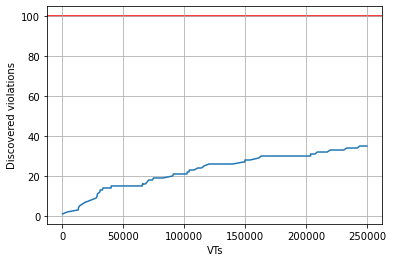

In [1]:
import pandas as pd

data = pd.read_csv("./data/EXP-00-comparison-with-paper.csv", skipinitialspace=True)

pp = data[pd.notnull(data["state"])].plot(x="vts", xlabel="VTs", y="uniques", ylabel="Discovered violations", grid=True, legend=False)
pp.axhline(y=100, color="red", zorder=0)

In the paper, waypoints discovery per VT is provided through this graphic.
We are only interested in the orange line (Full-Warp Grapple).


<img src="assets/EXP-00-grapple-paper-waypoints.png" width="420" />

## Conclusion, Discussion

Clearly, our implementation finds significantly less waypoints, even though the amount of VTs is considerably larger.

Thus, our hypothesis cannot be confirmed.

To further investigate differences between the implementations, we conduct additional experiments:

- In [EXP-01](EXP-01-comparison-waypoints-hll.ipynb), we confirm that waypoints are an actual indicator of state space coverage in our implementation by comparing them to the results from the HyperLogLog++ counting.
- In [EXP-02](EXP-02-large-hash-table.ipynb) and [EXP-03](EXP-03-shared-kernel.ipynb), we compare two key difference between the implementations: The hash table size and parallel execution of VTs.
- In [EXP-04](EXP-04-start-overs.ipynb), we try out our *start over* strategy that significantly increases waypoint discovery and execution time.